In [7]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [8]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [9]:
IN_DIR = "E:\\M2\\result\\20221028\\"
OUT_DIR = "E:\\M2\\result\\20221028\\"
sub_dir_list = [
    "dual_2\\1\\",
    "dual_2\\2\\",
    "dual_2\\3\\",
    "dual_2\\4\\",
    "dual_2\\5\\",
]

In [10]:
ptv_result = [np.zeros((1, 6))] * 11

In [11]:
for d in tqdm(range(0, 1)):
    for i in range(1, 10900, 10):
        try:
            tmp = np.loadtxt(OUT_DIR + "ptv\\" + sub_dir_list[d] + f"pp_{i}.csv", delimiter=',', skiprows=1)
        except StopIteration:
            tmp = None
        except OSError:
            tmp = None

        if tmp is None:
            pass
        elif tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                tmp = None
        elif tmp.ndim == 2:
            pass
        else:
            tmp = None

        if tmp is None:
            pass
        else:
            ptv_result[d] = np.vstack([ptv_result[d], tmp])

100%|██████████| 1/1 [00:04<00:00,  4.63s/it]


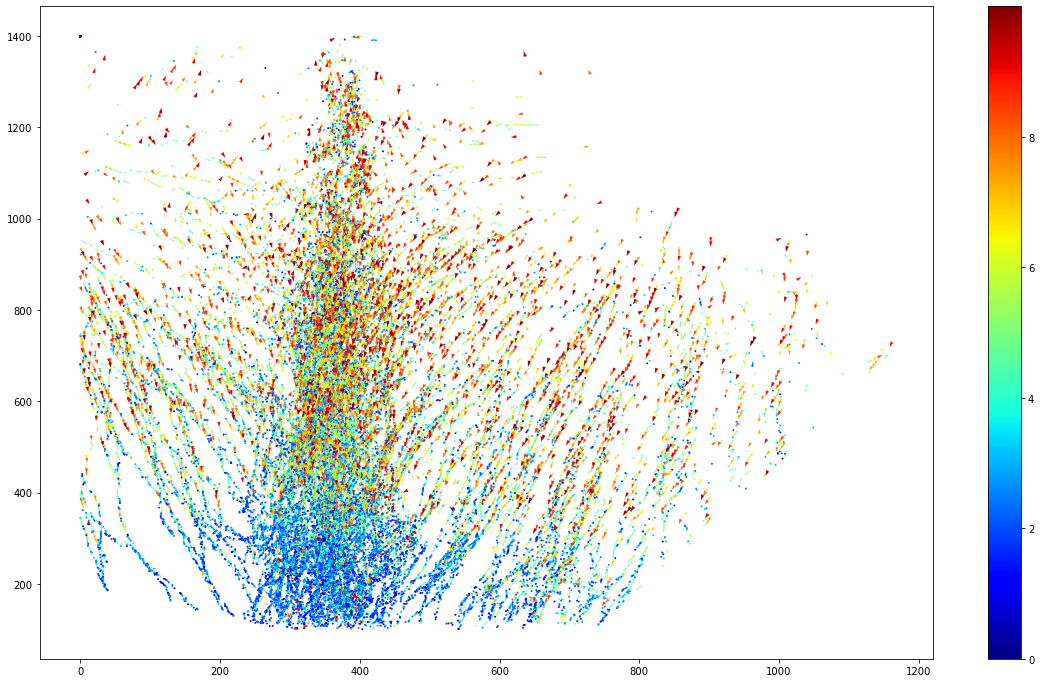

In [14]:
fig, ax = plt.subplots(figsize=(20, 12))
# plt.xlim(0, 1024)
# plt.ylim(0, 600)
c = ax.quiver(ptv_result[0][:, 0], 1400-ptv_result[0][:, 1], ptv_result[0][:, 2], -ptv_result[0][:, 3], np.sqrt(ptv_result[0][:, 2]**2 + ptv_result[0][:, 3]**2), cmap="jet")
fig.colorbar(c)
plt.show()